## Complete Fourier Analysis of the acceleration of the antenna tip

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

data_folder = Path("/Users/persie/PhD_Code/3d_ant_data_rle/")
session_list = [6,10,11,13,17,19,20,21,22,23,28,29,30]
obj_ref_frame = [500,180,380,849,459, 59, 842, 24, 93, 176, 2626, 595, 241 ]
prefix = "240905-1616"
skeleton_toml_path = "../skeleton.toml"


In [2]:
experiment = 6
session = session_list[experiment]
obj_ref = obj_ref_frame[experiment]

In [3]:
from scripts.tools.ground_truth_toml_reader import GroundTruth
from src.loader import InstanceLoader
from src.collision import CollisionDetector


gt = GroundTruth(data_folder, prefix, session)
track_list = gt["tracks"]


# Load the experiment
t = InstanceLoader(data_folder=data_folder,
                   session_number=session,
                   skeleton_toml_path=skeleton_toml_path,
                   obj_ref_frame=obj_ref,
                   prefix=prefix)


In [4]:
from scripts.tools.animal_dataframe import AnimalDataFrame
import numpy as np
node_of_interest = ['a_L2']
_acceleration_array = np.empty((10000000, len(node_of_interest)), dtype=np.float64)
n_samples = 0

In [5]:
track = '38'
animal = t.animal_list.animal(track)
adf = AnimalDataFrame(animal, None, node_of_interest, signed=True)
acceleration_df = adf.acceleration_mag(clean=False)

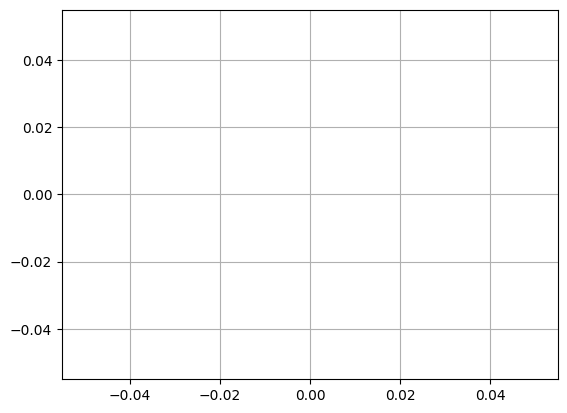

In [7]:
from scipy.fft import fft, fftfreq

N = len(acceleration_df)
T = 1
yf = fft(acceleration_df.dropna(axis=1))
xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N*np.abs(yf[0:N//2]))
plt.grid()
plt.show()




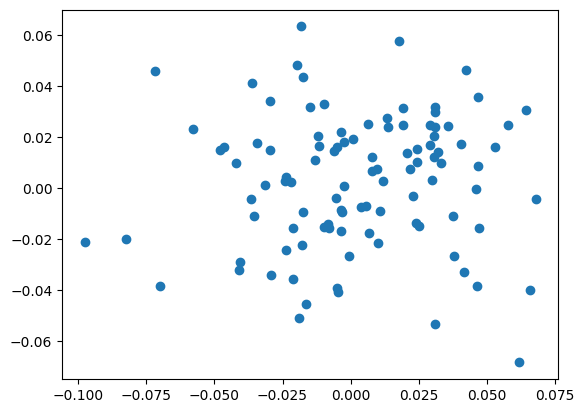